# Regresión Logistica con Python y scikit-learn

En este artículo, exploraremos cómo utilizar **la regresión logística con Python para construir algoritmo de machine learning para clasificación de datos de un evento binario o multiclase**. Antes de profundizar en la regresión logística, es importante tener una comprensión sólida de los requisitos previos necesarios para abordar esta técnica de modelado.

Estos son los requisitos previos que se necesitan para abordar la regresión logistica con Python:

- [Conocimiento de matemáticas para la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-a-Funciones-Matematicas-para-Data-Science-e-Inteligencia-Artificial-f9a47b52-0308-4e95-a3d3-c3de3ef7b14f)

- [Conocimiento de análisis exploratorio de datos.](https://deepnote.com/@mazzaroli/Analisis-exploratorio-de-datos-caba7762-e435-481e-9060-523263a820b1)
 
- Conocimiento de visualización de datos con [Matplotlib](https://matplotlib.org/stable/users/index.html) y [Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html).

- [Conocimiento de los fundamentos de la inteligencia artificial.](https://deepnote.com/@mazzaroli/Introduccion-teorica-al-machine-learning-c4aded88-a409-4731-b650-6b3b43963d21)

- [Conocimiento de los fundamentos de regresión lineal](https://deepnote.com/@mazzaroli/Regresion-Lineal-con-Python-y-scikit-learn-86f7bb72-770c-4e28-9e84-0355aed93892)


## Que es la regresion logistica?

En el ámbito del Machine Learning, existen tres tipos de algoritmos: el aprendizaje supervisado, el aprendizaje no supervisado y el aprendizaje por refuerzo. **La regresión logística es un algoritmo de aprendizaje supervisado**

Dentro del aprendizaje supervisados están los **algoritmos de clasificación y regresión**

**La regresión logística se utiliza** principalmente **para problemas de clasificación**, **donde se tiene que predecir la probabilidad de que un evento pertenezca a una de dos categorías posibles**, como (sí/no), (verdadero/falso), (spam/no spam), entre otros.

**La idea** básica detrás **de la regresión logística es crear una función** matemática **que pueda clasificar los datos acorde a la relación entre sus características** o variables predictoras y la variable objetivo o la categoría a predecir. **Esta función es la función sigmoide** y su fórmula y grafico son los siguiente.

$\displaystyle s(x) = \frac{1}{(1 + e^{-x})}$

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Funci%C3%B3n_sigmoide_01.svg/1200px-Funci%C3%B3n_sigmoide_01.svg.png' width=400>

**La función sigmoide se utiliza para calcular la probabilidad de que un evento pertenezca a una de dos categorías posibles,** tomando cualquier valor de entrada y comprimiendolo a un rango entre 0 y 1, lo que la hace ideal para estimar la probabilidad.

- **Si la probabilidad es mayor que 0.5**, se clasifica como **perteneciente a la categoría 1**,

- **Si es menor que 0.5**, se clasifica como **perteneciente a la categoría 0.** 

En otras palabras, si la probabilidad calculada es mayor al 50%, se predice que el evento pertenece a la categoría 1, y si es menor al 50%, se predice que pertenece a la categoría 0.


### Ejemplo

Supongamos que **un profesor quiere predecir la probabilidad de que un estudiante apruebe un examen en función de las horas de estudio.** Para ello, **recopila datos de 50 estudiantes** que han tomado el examen en el pasado y **registra las horas que cada uno estudió y si aprobó o no el examen**. A continuación, **el profesor construye un modelo de regresión logística para predecir la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio.**

El profesor asigna la variable **"1" si un estudiante aprueba** el examen y **"0" si no lo aprueba**. Luego, utiliza la **probabilidad de aprobar como variable objetivo** (eje $Y$) y las **horas de estudio como variables predictoras** (eje $X$). Luego, **ajusta la función sigmoide al conjunto de datos** para estimar la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio.

Finalmente, el profesor puede utilizar este modelo para predecir la probabilidad de que un estudiante apruebe el examen en función de las horas de estudio que dedica. 

Por ejemplo, **si un estudiante estudia durante 10 horas**, la función sigmoide puede predecir **una probabilidad del 80% de que el estudiante apruebe el examen**. En cambio, **si un estudiante estudia solo 5 horas**, la función sigmoide puede predecir **una probabilidad del 40% de que el estudiante apruebe el examen**.


<img src='https://datascientest.com/es/wp-content/uploads/sites/7/2020/10/unnamed-4.png' width=400>


## Tu primera clasificación con regresión logística

Aprenderemos a construir nuestra primera regresión logística con Python y la librería Scikit-learn en solo unos pocos pasos.

### Importar librerías

In [1]:
import numpy as np  # Librería para operaciones matemáticas con arrays
import pandas as pd  # Librería para manipulación de datos en formato tabla
import matplotlib.pyplot as plt  # Librería para visualización de gráficos
import seaborn as sns  # Librería para visualización de datos estadísticos
from sklearn.datasets import load_digits  # Conjunto de datos de dígitos escritos a mano
from sklearn.linear_model import LogisticRegression  # Modelo de regresión logística

### Carga de datos

**[load_digits](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)** es un conjunto de datos de dígitos escritos a mano que **consta de 1.797 imágenes** de **resolución 8x8 píxeles**, **cada píxel está representado como un valor en escala de grises entre 0 y 16**. 


**Las etiquetas corresponden a los números enteros del 0 al 9**, por lo que es útil para tareas de clasificación multiclase y es comúnmente utilizado como un ejemplo introductorio en la clasificación de imágenes en Machine Learning.

<img src='https://user-images.githubusercontent.com/8764683/59962629-0d3ce780-9523-11e9-8b21-5ffc9c588fd7.png' width=700>

In [2]:
# Cargamos el conjunto de datos digits
digits = load_digits()

In [3]:
# Accedemos a la primera fila de datos que representa la primera imagen en formato vectorial
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
# Transforma el vector de la primera imagen en una matriz de 8x8 píxeles
image = np.reshape(digits.data[8],(8,8))
image

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

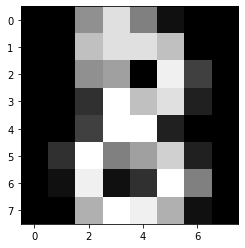

In [5]:
# Vemos la representación del a primera imagen
plt.imshow(image,cmap='gray')

## Split de datos en train y test

Al hacer un split de datos en train y test, separamos nuestro conjunto de datos en dos partes: 

- **train:** para entrenar el modelo.
- **test:**  para evaluar el desempeño del modelo. 

Esto nos permite evaluar la capacidad de nuestro modelo para generalizar a datos nuevos y no vistos durante el entrenamiento.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [7]:
print(f"""X_train: {X_train.shape}
y_train: {y_train.shape}

X_test: {X_test.shape}
y_test: {y_test.shape}""")

X_train: (1437, 64)
y_train: (1437,)

X_test: (360, 64)
y_test: (360,)


### Entrenamiento de modelo

In [8]:
# Instanciamos y ajustamos el modelo de regresión logística
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
pred = logistic_reg.predict(X_test)

## Evaluación del modelo

96.66666666666667


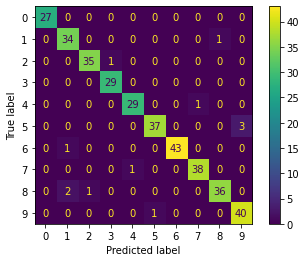

In [10]:
# ignorar las advertencias de FutureWarning.
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

plot_confusion_matrix(logistic_reg,X_test, y_test);
print(accuracy_score(y_test,pred)*100)

En nuestra evaluación del modelo logístico, obtuvimos una alta precisión y la mayoría de las predicciones fueron correctas. 

Nuestro modelo obtuvo un accuracy_score del 96.6%, lo que indica que es capaz de predecir correctamente la categoría del número en la mayoría de las veces.

### Carguemos nuestros propios números

Implementaremos un código que permitirá cargar imágenes hechas a mano y utilizar el modelo de regresión logística previamente entrenado para predecir qué dígito corresponde a cada imagen. Luego, se visualizará cada imagen con su respectiva predicción.

Si deseas replicarlo puedes probar con tus propias imagenes y ver si predice bien o no las imagenes.

In [11]:
from PIL import Image # Importamos la librería PIL para trabajar con imágenes
import numpy as np # Importamos numpy para manejar los datos de las imágenes

def classify(img_path):
  image_raw = Image.open(img_path).convert('L') # Abrimos la imagen y la convertimos a escala de grises
  image_procesed = image_raw.resize((8,8)) # Redimensionamos la imagen a una de 8x8 pixeles
  image_procesed = [np.array(image_procesed).flatten()] # Aplanamos la imagen y la convertimos a un arreglo numpy
  prediction = logistic_reg.predict(image_procesed)[0] # Predecimos con el modelo previamente entrenado
  return image_raw, prediction

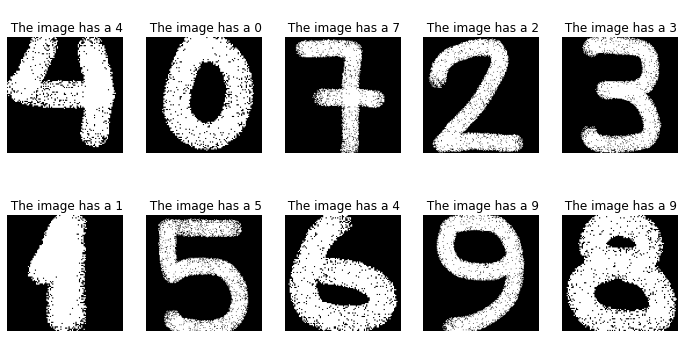

In [12]:
import matplotlib.pyplot as plt
import os

path = './handmade_digits'
files = os.listdir(path)

fig, ax = plt.subplots(2, 5, figsize=(12,6))

for i in range(2):
    for j in range(5):
        img,pred, = classify(f'./handmade_digits/{files[i*5+j]}')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title(f'\n The image has a {pred}')

Después de cargar nuestros propios números y probarlos con el modelo de regresión logística, se obtuvo una predicción correcta para la mayoría de las imágenes. Sin embargo, el número 8 fue confundido con un 9 y el número 6 fue confundido con un 4.

## ¿Cuándo usar regresión logística?


La regresión logística es un modelo estadístico utilizado para analizar la relación entre una variable dependiente categórica y una o más variables independientes. 

### Ventajas

- **Fácil de implementar:** La regresión logística es relativamente fácil de implementar, se puede ajustar a los datos utilizando sklearn como vimos anteriormente. Además, se puede utilizar en conjunción con otros métodos de análisis, como análisis de regresión, análisis discriminante y análisis de supervivencia.

- **Coeficientes interpretables:** Los coeficientes de la regresión logística son fácilmente interpretables y proporcionan información sobre la relación entre las variables independientes y la variable dependiente. Esto permite identificar qué variables tienen un efecto significativo en la variable dependiente y cómo afectan a las probabilidades de una observación de pertenecer a una clase específica.

- **Inferencia de la importancia de cada característica:** Puede proporcionar información sobre la importancia relativa de cada feature en la predicción de la variable dependiente. Esto es útil en la selección de características para modelos predictivos, ya que permite a los investigadores centrarse en las variables más importantes y descartar las menos importantes.

- **Clasificación en porcentajes:** Se puede utilizar para predecir la probabilidad de una observación de pertenecer a una clase específica. Estas probabilidades se pueden convertir en una clasificación binaria utilizando un umbral de probabilidad, por ejemplo decir que con un 80% de certeza la clasificacion es 1

- **excelentes resultados con conjuntos de datos linealmente separables:** Si las dos clases están linealmente separadas, entonces la regresión logística puede encontrar una línea recta o un hiperplano que separe las dos clases y proporcionar una clasificación precisa.

### Desventajas

- **Asume linealidad entre las variables dependientes:** La regresión logística asume una relación lineal entre las variables independientes y la variable dependiente. Si la relación no es lineal, puede proporcionar estimaciones incorrectas y, por lo tanto, puede no ser el modelo adecuado para el análisis.

- **Overfitting sobre datasets de alta dimensionalidad:** Puede ser susceptible al overfitting en conjuntos de datos de alta dimensionalidad, es decir, puede ajustarse demasiado a los datos y producir modelos que no generalizan bien a nuevos datos.

- **Le afecta la multicolinealidad de variables:** La multicolinealidad se refiere a la alta correlación entre dos o más variables independientes. La regresión logística puede verse afectada por la multicolinealidad, lo que puede hacer que las estimaciones de los coeficientes de la regresión sean imprecisas.

- **Mejores resultados con datasets grandes:** La regresión logística puede proporcionar resultados más precisos y robustos cuando se aplica a conjuntos de datos grandes en lugar de pequeños. Esto se debe a que, en general, cuantas más observaciones haya en el conjunto de datos, más precisas serán las estimaciones de los parámetros del modelo.



### Cuando usarla?

- **Probabilidad de ocurrencia sobre un evento categórico:** Cuando se trata de analizar datos en los que se desea modelar la probabilidad de ocurrencia de un evento categórico, como si un cliente comprará o no un producto o si un paciente tiene una enfermedad o no.

- **Datasets linealmente separables:** Si los datos se pueden separar en dos grupos mediante una línea recta o hiperplano, entonces la regresión logística puede proporcionar una clasificación precisa y rápida.

- **Datasets grandes:** La regresión logística es adecuada para conjuntos de datos grandes y complejos debido a su rapidez y eficiencia. La regresión logística puede manejar grandes cantidades de datos y proporcionar resultados precisos y confiables.

- **Datasets balanceados:** La regresión logística es adecuada para conjuntos de datos balanceados, lo que significa que hay aproximadamente el mismo número de observaciones en cada categoría de la variable dependiente. Esto se debe a que la regresión logística se basa en el principio de máxima verosimilitud, que asume que las categorías en la variable dependiente son igualmente probables.

## Fórmula de regresión logística

La fórmula de la regresión logística es una expresión matemática que **describe la relación entre las variables predictoras y la probabilidad de que ocurra un evento binario**. La fórmula se escribe como:


$\displaystyle P(y=1|x_1,x_2,\cdots,x_n) = \frac{1}{1 + e^{\displaystyle-(b0 + b1x1 + b2x2 + ... + bnxn)}}$

donde:

- **p**: es la probabilidad del evento binario (por ejemplo, la probabilidad de éxito en una prueba)
- **e**: es la constante matemática e (2.71828...)
- **b0**: es la constante de intercepción (también llamada término de sesgo)
- **b1, b2, ..., bn**: son los coeficientes de las variables predictoras x1, x2, ..., xn

La ecuación de regresión logística **se basa en el modelo de odds** (razón de probabilidad), que **se define como la probabilidad de que un evento ocurra dividida por la probabilidad de que no ocurra.** En el caso de un evento binario, la odds se expresa como:

$\displaystyle odds = \frac{p}{(1 - p)}$

donde **p es la probabilidad del evento**. La odds puede tomar valores desde cero (cuando la probabilidad es cero) hasta infinito (cuando la probabilidad es uno).

La ecuación de regresión logística utiliza la **transformación logarítmica de la odds**, que se expresa como:

$\log(odds) = b0 + b1x1 + b2x2 + ... + bnxn$

Esta ecuación es equivalente a la ecuación de la regresión logística, ya que la transformación exponencial de la ecuación de odds da como resultado la ecuación de la regresión logística.

formula de la regresion logistica con los odds:

$\displaystyle p = \frac{1}{1 + e^{-\log(\frac{p}{1-p})}}$


**Para estimar los valores de los coeficientes b0, b1, ..., bn, se utiliza el método de máxima verosimilitud**. 



## Estimación  de maxima verosimilitud (Maximum Likelihood Estimation)

**MLE (Maximum Likelihood Estimation) es un método de estimación utilizado en la regresión logística para encontrar los valores de los parámetros que maximizan la probabilidad de que los datos observados sean generados por un modelo específico.** En la regresión logística, se utiliza el MLE para encontrar los valores de los coeficientes que describen la relación entre una variable dependiente binaria y una o más variables independientes continuas o categóricas.

El modelo de regresión logística utiliza la función logística para modelar la probabilidad de que la variable dependiente tome un valor de 1 en términos de las variables independientes:

$\displaystyle P(y=1|x_1,x_2,\cdots,x_n) = \frac{1}{1 + e^{\displaystyle-(b0 + b1x1 + b2x2 + ... + bnxn)}}$

Donde $y$ es la variable dependiente binaria, $x_1, x_2, ..., x_n$ son las variables independientes, $\beta_0, \beta_1, \beta_2, ..., \beta_n$ son los coeficientes desconocidos que deben ser estimados y $e$ es la base del logaritmo natural.

El objetivo de MLE en la regresión logística es encontrar los valores de los coeficientes $\beta_0, \beta_1, \beta_2, ..., \beta_n$ que maximizan la probabilidad de observar los datos dados los valores de las variables independientes. La función de verosimilitud se define como:

$\displaystyle L(\beta 0 + \beta 1 + \beta 2 + ... + \beta n) = \prod_{i=1}^{N}[P(y=1|x_1,x_2,\cdots,x_n)]^{y_i}*[1-P(y=1|x_1,x_2,\cdots,x_n)]$

Donde $N$ es el número de observaciones en los datos de entrenamiento y $y_i$ es la variable dependiente para la i-ésima observación. La función de verosimilitud mide la probabilidad conjunta de observar los valores de $y_1, y_2, ..., y_N$ dados los valores de $x_{i1}, x_{i2}, ..., x_{in}$ y los coeficientes $\beta_0, \beta_1, \beta_2, ..., \beta_n$.

La función de verosimilitud puede ser difícil de maximizar directamente debido a su forma. Por lo tanto, se utiliza el logaritmo natural de la función de verosimilitud, llamado log-verosimilitud, para simplificar la maximización:


La función de log-verosimilitud se define como:

$\log loss =\displaystyle \frac{1}{N} \sum \limits_{i=1}^N - (y_i*log(P_i)+(1-y_i)*log(1-P_i))$

donde:

- $P_i$: Probabilidad de la clase 1
- $1- P_i$: Probabilidad de la clase 0


| Predicted probabilities    | Actual Class $(y_i)$ | $y_i*log(p_i)$       | $(1-y_i)*log(1-p_i)$ | $y_i*log(p_i)+(1-y_i)*log(1-p_i)$ |
|-------------------------   |---------------|----------------      |----------------------|-----------------------------------|
| 0.8                        | Positive (=1) | $1*\log 0.8=-0.2231$ | $0*\log 0.2=0$       | -0.2231                           |
| 0.15                       | Positive (=1) | $1*\log 0.15=-1.8971$| $0*\log 0.85=0$      | -1.8971                           |
| 0.95                       | Negative (=0) | $0*\log 0.95=0$      | $0*\log 0.05=-2.9957$| -2.9957                           |

### Contenido práctico:

#### [1. Logistic Regression Cost Function | Machine Learning | Simply Explained](https://www.youtube.com/watch?v=ar8mUO3d05w)
#### [2. Logistic Regression Gradient Descent | Derivation | Machine Learning](https://www.youtube.com/watch?v=t6MVuMavbBY)
#### [3. Derivative of Cost function for Logistic Regression | Machine Learning](https://www.youtube.com/watch?v=t6MVuMavbBY)

# Proyecto de regresión logística binomial

[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

En este proyecto, trabajaremos con el dataset ["Telco Customer Churn"](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) para aplicar la regresión logística binomial y **predecir el abandono de clientes en una compañía de telecomunicaciones**.

Para ello, utilizaremos diferentes técnicas como la **preparación de datos**, **análisis exploratorio de los datos**, **aplicaremos el modelo de regresión logística construido** y finalmente **interpretaremos los resultados** obtenidos para comprender el churn de la empresa.

## Conociendo nuestro dataset

**El dataset "Telco Customer Churn" contiene 7043 registros y 21 atributos.** Estos atributos incluyen información demográfica de los clientes, servicios contratados, información de facturación y la variable objetivo "Churn", que indica si el cliente ha abandonado o no la compañía de telecomunicaciones.


### Atributos:


1. **CustomerID:** identificador único del cliente.

1. **gender:** género del cliente.

1. **SeniorCitizen:** variable binaria que indica si el cliente es mayor de 65 años.

1. **Partner:** variable binaria que indica si el cliente tiene pareja.

1. **Dependents:** variable binaria que indica si el cliente tiene dependientes.

1. **Tenure:** cantidad de meses que el cliente ha estado en la compañía.

1. **PhoneService:** variable binaria que indica si el cliente tiene servicio telefónico.

1. **MultipleLines:** variable categórica que indica si el cliente tiene una o múltiples líneas telefónicas.

1. **InternetService:** variable categórica que indica si el cliente tiene servicio de internet y el tipo de conexión (DSL, fibra óptica o sin conexión).

1. **OnlineSecurity:** variable categórica que indica si el cliente tiene servicio de seguridad en línea.

1. **OnlineBackup:** variable categórica que indica si el cliente tiene servicio de respaldo en línea.

1. **DeviceProtection:** variable categórica que indica si el cliente tiene servicio de protección de dispositivos.

1. **TechSupport:** variable categórica que indica si el cliente tiene servicio de soporte técnico.

1. **StreamingTV:** variable categórica que indica si el cliente tiene servicio de televisión por streaming.

1. **StreamingMovies:** variable categórica que indica si el cliente tiene servicio de películas por streaming.

1. **Contract:** variable categórica que indica el tipo de contrato del cliente (mes a mes, anual o bianual).

1. **PaperlessBilling:** variable binaria que indica si el cliente recibe facturas en línea o por correo.

1. **PaymentMethod:** variable categórica que indica el método de pago del cliente.

1. **MonthlyCharges:** cantidad mensual de dinero que el cliente paga a la compañía.

1. **TotalCharges:** cantidad total de dinero que el cliente ha pagado a la compañía hasta el momento.

1. **Churn:** variable binaria que toma el valor de "Yes" si el cliente ha cancelado su contrato y "No" si el cliente aún sigue siendo cliente de la compañía.


### Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

### Carga de datos


In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data pre-processing

En el siguiente preprocesamiento de datos:

- eliminaremos duplicados 
- evaluaremos valores nulos 
- removeremos columnas innecesarias 
- procesaremos los datos categóricos 
- eliminaremos los outliers 
- escalaremos la data para su mejor uso en el modelo.





### Dataset information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cambiar total_charges a numeric

la columna "TotalCharges" se encuentra en formato de object, cuando debería estar en formato float64 al igual que la columna "MonthlyCharges". Es necesario convertir esta columna a formato numérico para su análisis.

In [4]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Después de convertir la columna "TotalCharges" del dataset a formato numérico, nos encontramos con valores faltantes. Ahora debemos decidir cómo tratar estos datos faltantes antes de continuar con el análisis.

### Manejo de datos nulos

In [6]:
print(f'''
{'='*52}
DATOS FALTANTES EN TODAS LAS COLUMNAS.
{'='*52}
{df.isnull().sum()}
{'='*52}
PROPORCIÓN DE DATOS FALTANTES EN TOTALCHARGES: {((df.isnull().sum()['TotalCharges']/df.count()['TotalCharges'])*100).round(3)}%
{'='*52}''')




DATOS FALTANTES EN TODAS LAS COLUMNAS.
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
PROPORCIÓN DE DATOS FALTANTES EN TOTALCHARGES: 0.156%


Los valores faltantes representan menos del 0.157% de los datos, por lo que se optó por eliminarlos del conjunto de datos.

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Eliminar id

Eliminaremos la columna "customerID" del conjunto de datos ya que es simplemente un identificador único para cada cliente y no tiene relación con las variables que influyen en la decisión de un cliente de cancelar o no su servicio.

In [9]:
df.drop('customerID',axis=1, inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convertir a numerico la variable objetivo

Convertiremos las variables de la columna "Churn" a valores numéricos (0 o 1) ya que nuestro modelo de regresión logística requiere variables de entrada numéricas para predecir la probabilidad de churn.

In [11]:
df.Churn.replace(to_replace=['Yes','No'], value=[1,0], inplace=True)

In [12]:
df_processing = df.copy()

### Manejo de variables categóricas 

Manejaremos las variables categóricas a numéricas con un One Hot Encoding para poder trabajar mejor con los algoritmos de machine learning.

In [13]:
df_processing = pd.get_dummies(df_processing)
df_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### Análisis de correlación

<AxesSubplot: xlabel='Churn', ylabel='index'>

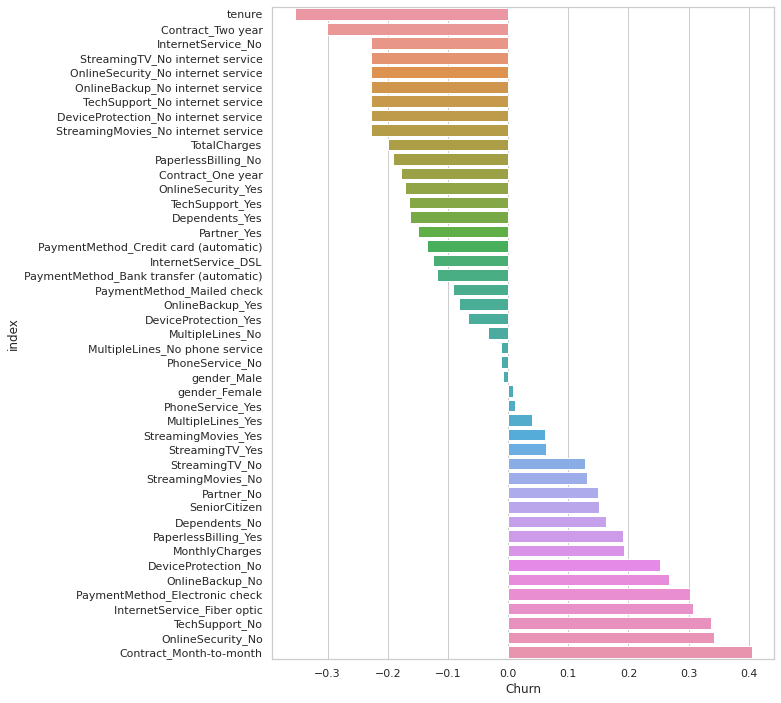

In [14]:
plt.figure(figsize=(9,12))
corr = df_processing.corr()['Churn'].sort_values(ascending=True).reset_index()[0:45]
sns.barplot(data=corr, x='Churn',y='index')

### Insight

- La correlación más fuerte con la variable objetivo (Churn) es la duración del contrato (Contract). **Los contratos a corto plazo tienen una correlación positiva** con la variable Churn, lo que sugiere que los clientes con contratos a corto plazo son más propensos a darse de baja. Por otro lado, **los contratos a largo plazo tienen una correlación negativa** con Churn, lo que sugiere que los clientes con contratos a largo plazo son menos propensos a darse de baja.

- **Los clientes con servicios adicionales, como múltiples líneas telefónicas o servicios de streaming de TV y películas, tienen una correlación** negativa con Churn, lo que sugiere que estos servicios pueden aumentar la satisfacción del cliente y reducir la probabilidad de darse de baja. Por otro lado, **aquellos clientes que no cuentan con estos servicios presentaron una correlación positiva** con la variable objetivo (Churn), lo que sugiere que estos clientes son más propensos a darse de baja.

- Los clientes con **facturación electrónica tienen una correlación negativa** con Churn, lo que sugiere que esta opción puede hacer que sea más fácil para los clientes mantenerse al día con los pagos y reducir la probabilidad de darse de baja.

### Escalabilidad de datos

Escalaremos los datos debido a las diferencias de pesos entre las variables, como la edad, el pago mensual y el pago anual, para que no influyan más las variables con valores más grandes y las más pequeñas sean ignoradas.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
df_processing_scaled = scaler.fit_transform(df_processing)

In [17]:
df_processing_scaled

array([[0.        , 0.        , 0.11542289, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.46478873, 0.38507463, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.01408451, 0.35422886, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.14084507, 0.11293532, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.04225352, 0.55870647, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.91549296, 0.86965174, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
df_processing_scaled = pd.DataFrame(df_processing_scaled)

In [19]:
df_processing_scaled.columns = df_processing.columns

In [20]:
df_processing_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,0.323944,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0.0,0.140845,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1.0,0.042254,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Análisis exploratorio de datos

Realizaremos un análisis exploratorio de datos (EDA) que incluirá tanto el análisis de las variables categóricas como el de las variables numéricas del conjunto de datos teniendo en cuenta la variable objetivo (Churn).

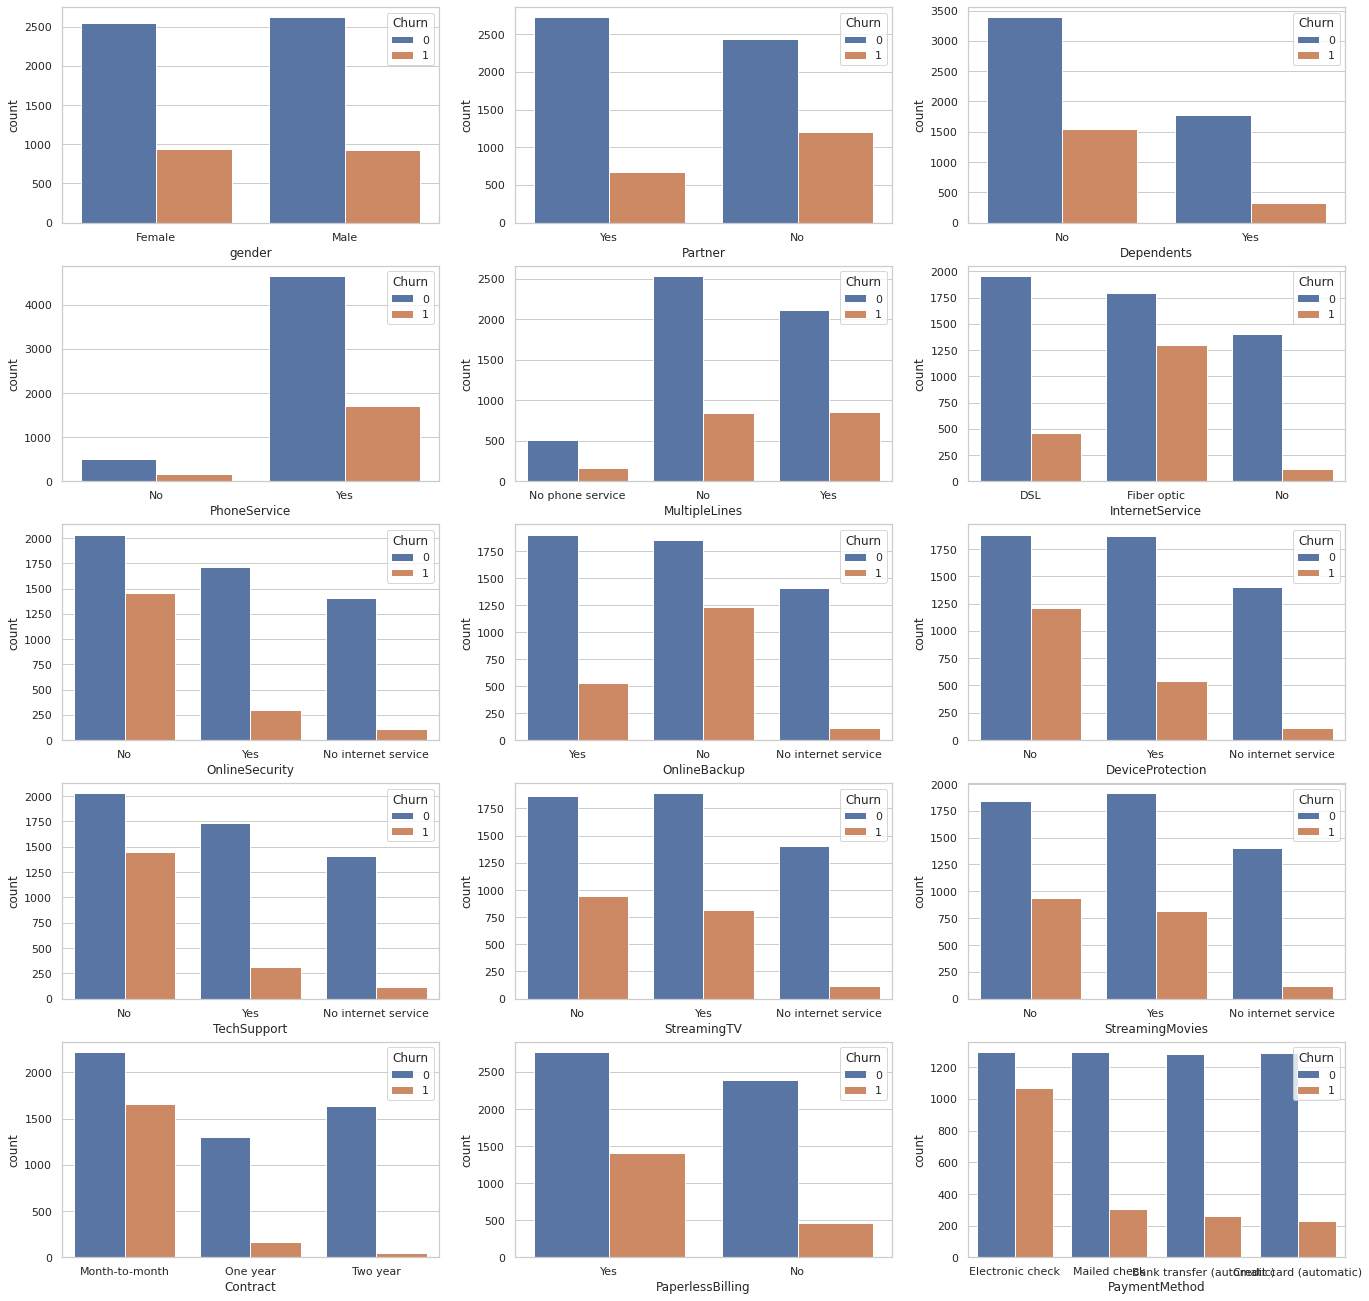

In [21]:
columns_cat = df.select_dtypes(include='object').columns

# Crear la figura y los subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(23, 23))

for var, ax in zip(columns_cat, axs.flatten()):
    sns.countplot(data=df, x=var,hue='Churn', ax=ax)

### Insight

- La variable "gender" no parece tener una correlación significativa con la tasa de churn.

- Los clientes con "Partner" (pareja) y "Dependents" (dependientes) tienen menos probabilidades de darse de baja.

- Los clientes que tienen "PhoneService" (servicio telefónico) y "MultipleLines" (múltiples líneas telefónicas) tienen menos probabilidades de darse de baja.

- Los clientes que tienen fibra optica en "InternetService" (servicio de internet) tienen una alta tasa de churn en comparacion de los que tienen DSL y no tienen.

- Los clientes que no tienen "OnlineSecurity" (seguridad en línea), "OnlineBackup" (respaldo en línea), "DeviceProtection" (protección de dispositivo) y "TechSupport" (soporte técnico) tienen una alta tasa de churn.

- Los clientes que utilizan servicios de "StreamingTV" (televisión por streaming) y "StreamingMovies" (películas por streaming) parecen tener una correlación positiva con la tasa de churn.

- Los clientes con contratos a corto plazo (mes a mes) tienen una alta tasa de churn en comparación con aquellos con contratos a largo plazo.

- Los clientes que utilizan "PaperlessBilling" (facturación sin papel) tienen una alta tasa de churn.

- Los clientes que utilizan "Electronic check" (cheques electrónicos) como método de pago tienen una alta tasa de churn en comparación con otros métodos de pago.

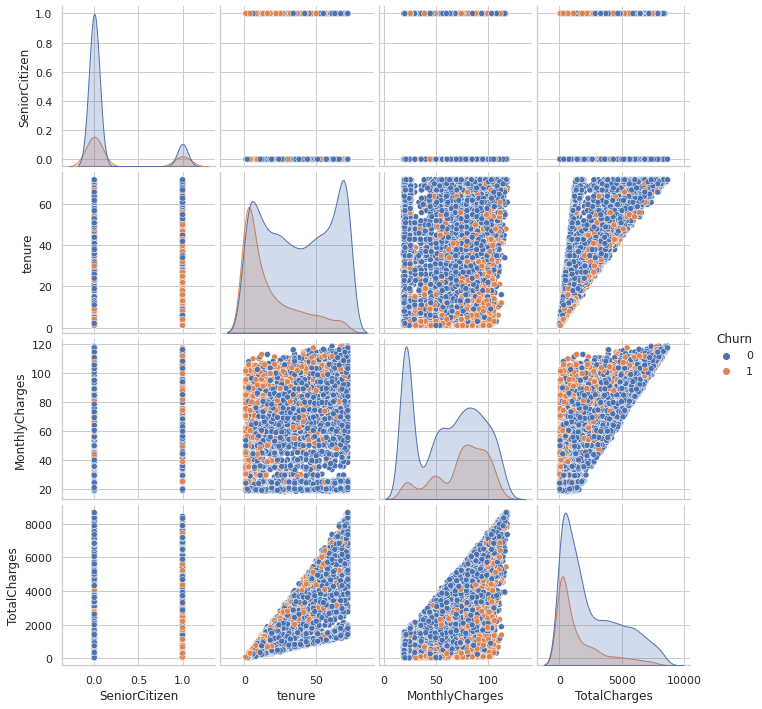

In [22]:
sns.pairplot(data=df, hue='Churn')

### Insight
- se puede observar que la combinación de una factura elevada en un período corto de tiempo (por ejemplo, en el primer o segundo mes) parece estar fuertemente asociada con la cancelación de servicios (churn) por parte del cliente. Esto sugiere que los clientes son más sensibles a los precios y están dispuestos a cancelar sus servicios si sienten que están pagando demasiado en un corto período de tiempo.

## Entrenamiento con regresión logística binomial

In [23]:
X = df_processing_scaled.drop('Churn', axis=1)
y = df_processing_scaled['Churn'].values

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [25]:
print(f"""X_train:{X_train.shape}
X_test:{X_test.shape}

y_train:{y_train.shape}
y_test:{y_test.shape}""")

X_train:(4922, 45)
X_test:(2110, 45)

y_train:(4922,)
y_test:(2110,)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train,y_train)

/home/mazzaroli/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score: 0.795734597156398


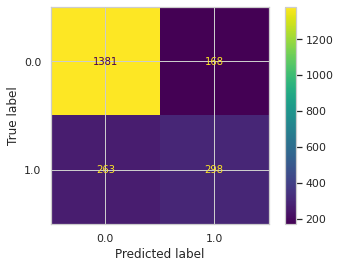

In [27]:
from sklearn import metrics

pred_test = model.predict(X_test)
print('accuracy_score:',metrics.accuracy_score(y_test,pred_test))
metrics.ConfusionMatrixDisplay.from_estimator(model,X_test, y_test)

## Evaluando el modelo

In [54]:
pd.DataFrame(model.predict_proba(X_test))

,0,1
0,0.990212,0.009788
1,0.861775,0.138225
2,0.301930,0.698070
3,0.856942,0.143058
4,0.658921,0.341079
...,...,...
2105,0.891551,0.108449
2106,0.962366,0.037634
2107,0.990283,0.009717
2108,0.701324,0.298676


In [75]:
a=model.coef_.flatten()
b=model.feature_names_in_.flatten()

In [128]:
c=pd.DataFrame(data=[a]).T
c.index = b
c.columns = ['coef']
c=c.sort_values(ascending=False,by='coef')


<AxesSubplot: title={'center': 'Los 10 factores principales que retienen a los clientes'}>

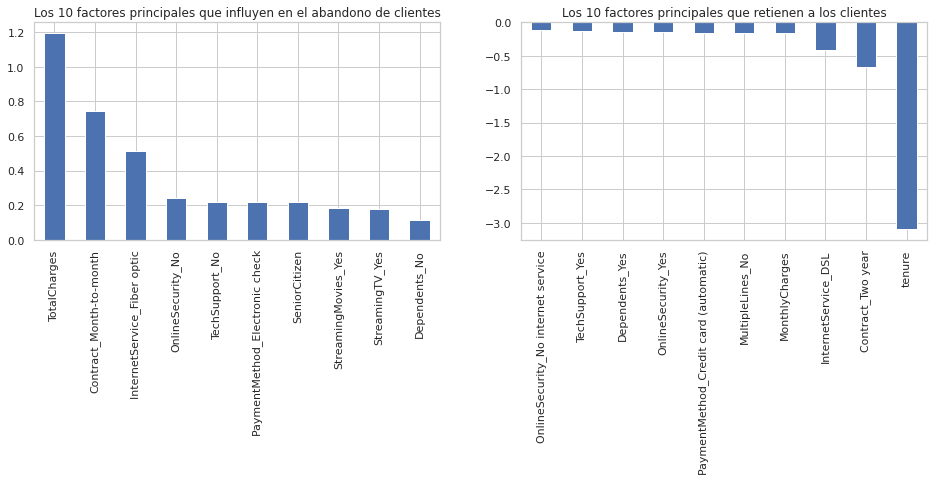

In [188]:
weights = pd.Series(model.coef_[0], index=X.columns.values)

fig,axs = plt.subplots(1,2,figsize=(16,4))

weights.sort_values(ascending=False).head(10).plot(kind='bar',ax=axs[0],title='Los 10 factores principales que influyen en el abandono de clientes')
weights.sort_values(ascending=False).tail(10).plot(kind='bar',ax=axs[1],title='Los 10 factores principales que retienen a los clientes')

In [ ]:
print(weights.sort_values(ascending=False).head(10).plot(kind='bar'))


In [131]:
df.count()

gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [151]:
df.Churn.value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64